Colab Link: https://colab.research.google.com/drive/1DJk3T68Dr1tBbjb_S14DHZ737IJCbZYg?usp=chrome_ntp#scrollTo=qTGQssL1OL27

Team 10 Members: Lorelei Liu, Simiao Ye, Yuanshan Zhang, Mengxin Zhao

# **Problem Definition**

Through this project, Team 10 will explore over 10,000 online shopping sessions from a dataset called Online Shoppers Purchasing Intention Dataset, examine the actions of the visitors, and finally find out the best model based on the data collected to predict shoppers' decision-making: will they make a purchase or not?

In order to find the best predicting model, we decide to build a pipeline with the most optimal number of features, and fit in different models. The models we want to test include Logistic Regression, Random Forest, SVM, MLP, and XG Boost. Finally, we may use stacking to compare the results. Finetuning of hyperparameters will also be involved.

With a collective interest in consumer analytics, we would like to develop our skills in data manipulation and modeling for our future use by studying the dataset. Moreover, e-commerce business owners can benefit from this type of study by learning buyers' behaviors and adjusting their marketing/selling strategies.

# **Data Source & Description**

Data Source: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

Sourced from the UCI Machine Learning Repository, this dataset from 2018 consists of 12,330 lines and 18 instances, including both numerical and categorical variables, enlightening a comprehensive map of customers' behavior. It includes crucial insights into the duration of time customers spend on a website, their navigation patterns, bounce rates between pages, the frequency of page views during each visit, and so on.


| Instance       | Type                                    | Description  |
|----------------|----------------------------------------|------------|
| Administrative |Numerical                    | Number of pages visited by the visitor about account management    |
| Administrative duration	       |Numerical	                     |Total amount of time (in seconds) spent by the visitor on account management related pages
| Informational          |	Numerical	               |Number of pages visited by the visitor about Web site, communication and address information of the shopping site |
|Informational duration	|Numerical	|Total amount of time (in seconds) spent by the visitor on informational pages|
|Product related|Numerical                  |Number of pages visited by visitor about product related pages |
|Product related duration|Numerical	               |Total amount of time (in seconds) spent by the visitor on product related pages|
|Bounce rate	|Numerical	                   |Average bounce rate value of the pages visited by the visitor	  |
|Exit rate	|Numerical	               |Average exit rate value of the pages visited by the visitor|
|Page value	          |Numerical	                   |Average page value of the pages visited by the visitor         |
|Special day	  |Numerical	                   |Closeness of the site visiting time to a special day |
|OperatingSystems	        |Categorical	                   |Operating system of the visitor      |
|Browser	        |Categorical	               |Browser of the visitor
|Region	        |Categorical                  |Geographic region from which the session has been started by the visitor|
|TrafficType	   |Categorical	                  |Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)|
|VisitorType	|Categorical                   |Visitor type as "New Visitor", "Returning Visitor", and "Other"|
|Weekend      |Categorical	               |Boolean value indicating whether the date of the visit is weekend|
|Month	|Categorical	           |Month value of the visit date|
|Revenue	      |Categorical                 |Class label indicating whether the visit has been finalized with a transaction|

# **Libraries**

In [ ]:
!pip install keras-tuner -q

First, let's import necessary packages for further study.

In [ ]:
# Basic data handling and mathematical operations
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import randint

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm

# Machine learning - Data preprocessing
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Feature selection
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier

# Machine learning - Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Performance Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, recall_score

# Machine learning - Dimension Reduction
from sklearn.decomposition import PCA

# Machine learning - Pipeline and configuration
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

# Oversampling Pipleline
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline as imblearnPipeline

# Setting seaborn style
sns.set_style("whitegrid", {"grid.color": ".8", })

# Machine learning
# Classification models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# MLP
import keras_tuner as kt
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import AUC, Recall
from keras import backend as K

# Model deployment
import joblib

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

Import data from UCI repository.

In [ ]:
# Clear all files in the current working directory for each run
!rm -rf /content/*

# Download the data directly from UCI repository
!wget https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip

# Unzip the download file
!unzip /content/online+shoppers+purchasing+intention+dataset.zip

--2023-12-05 04:24:23--  https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+shoppers+purchasing+intention+dataset.zip’

online+shoppers+pur     [  <=>               ]   1.02M  2.75MB/s    in 0.4s    

2023-12-05 04:24:24 (2.75 MB/s) - ‘online+shoppers+purchasing+intention+dataset.zip’ saved [1072219]

Archive:  /content/online+shoppers+purchasing+intention+dataset.zip
 extracting: online_shoppers_intention.csv  


Then, we load the dataset and name it as 'data'.

In [ ]:
# Show all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the dataset
data = pd.read_csv('/content/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# **EDA**

## Check Missing Values

Before we work on the dataset, we want to make sure that there is no null value. To check, we look at the dataset information.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

There is no missing value in the dataset, and we are ready to proceed.

## Check Duplicates

After checking the missing values, we want to see if there is any duplicate in the dataset.

In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
duplicates

125

We find there are 125 duplicates, and we decide to drop them.

In [ ]:
# Drop duplicates
data.drop_duplicates(inplace=True)

The duplicates are dropped, and we now can move further.

## Identify categorical & numeric features

To train the model which predicts buyers' decisions, we may need to identify categorical and numeric variables first.

To have an overview of all of the features, we count the unique values and look at the data type of each of them.

In [ ]:
# Calculate the number of unique values and data types for each feature
unique_count = data.nunique()
data_types = data.dtypes

# Create a new DataFrame containing feature names, unique value counts, and data types
unique_count_df = pd.DataFrame({'Feature': unique_count.index, 'Unique Count': unique_count.values, 'Data Type': data_types}).reset_index(drop=True)

unique_count_df

,Feature,Unique Count,Data Type
0,Administrative,27,int64
1,Administrative_Duration,3335,float64
2,Informational,17,int64
3,Informational_Duration,1258,float64
4,ProductRelated,311,int64
5,ProductRelated_Duration,9551,float64
6,BounceRates,1872,float64
7,ExitRates,4777,float64
8,PageValues,2704,float64
9,SpecialDay,6,float64


Categorical features are variables that are not continuous and do not have numerical significance. For example, 'Month' is a categorical variable since the number puts the data in a specific month group rather than having numerical significance that helps with any kind of calculation.

After checking the data, we can determine that 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', and 'Weekend' columns contain categorical variables, and the rest contain numeric variables.



In [ ]:
# Set Categorical Features
categorical_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
numeric_features = [col for col in data.columns if (col not in categorical_features) & (col != 'Revenue')]
print('Categorical features are:', categorical_features)
print('Numeric Features are:', numeric_features)

Categorical features are: ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
Numeric Features are: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']


## Visualize Target

The problem we are trying to solve is a binary classification where 'Revenue' should be viewed as our target. The 'Revenue' column contains two unique values, True and False, determining if a customer makes a purchase.

To see how the results are distributed and if we should make any adjustment when training the model, we count the number of True and False, and visualize it.

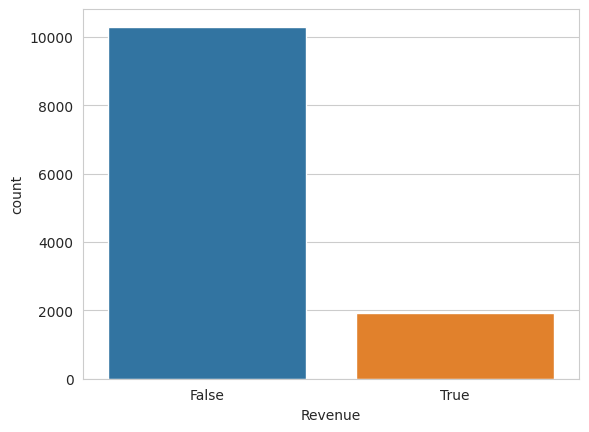

In [ ]:
# Count plot of Target
sns.countplot(x = 'Revenue',
              data = data,
              )
plt.show()

In [ ]:
data['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [ ]:
per = data['Revenue'].value_counts()[0]/(data['Revenue'].value_counts()[0]+data['Revenue'].value_counts()[1])
per

0.8436706267922982

From the above, we can make these conclusions:
* Baseline for accuracy is 0.844.
* Class imbalance issue exists in the dataset.



## Viualize categorical features

To see how categorical features are distributed, we count the number of them and visualize the result.

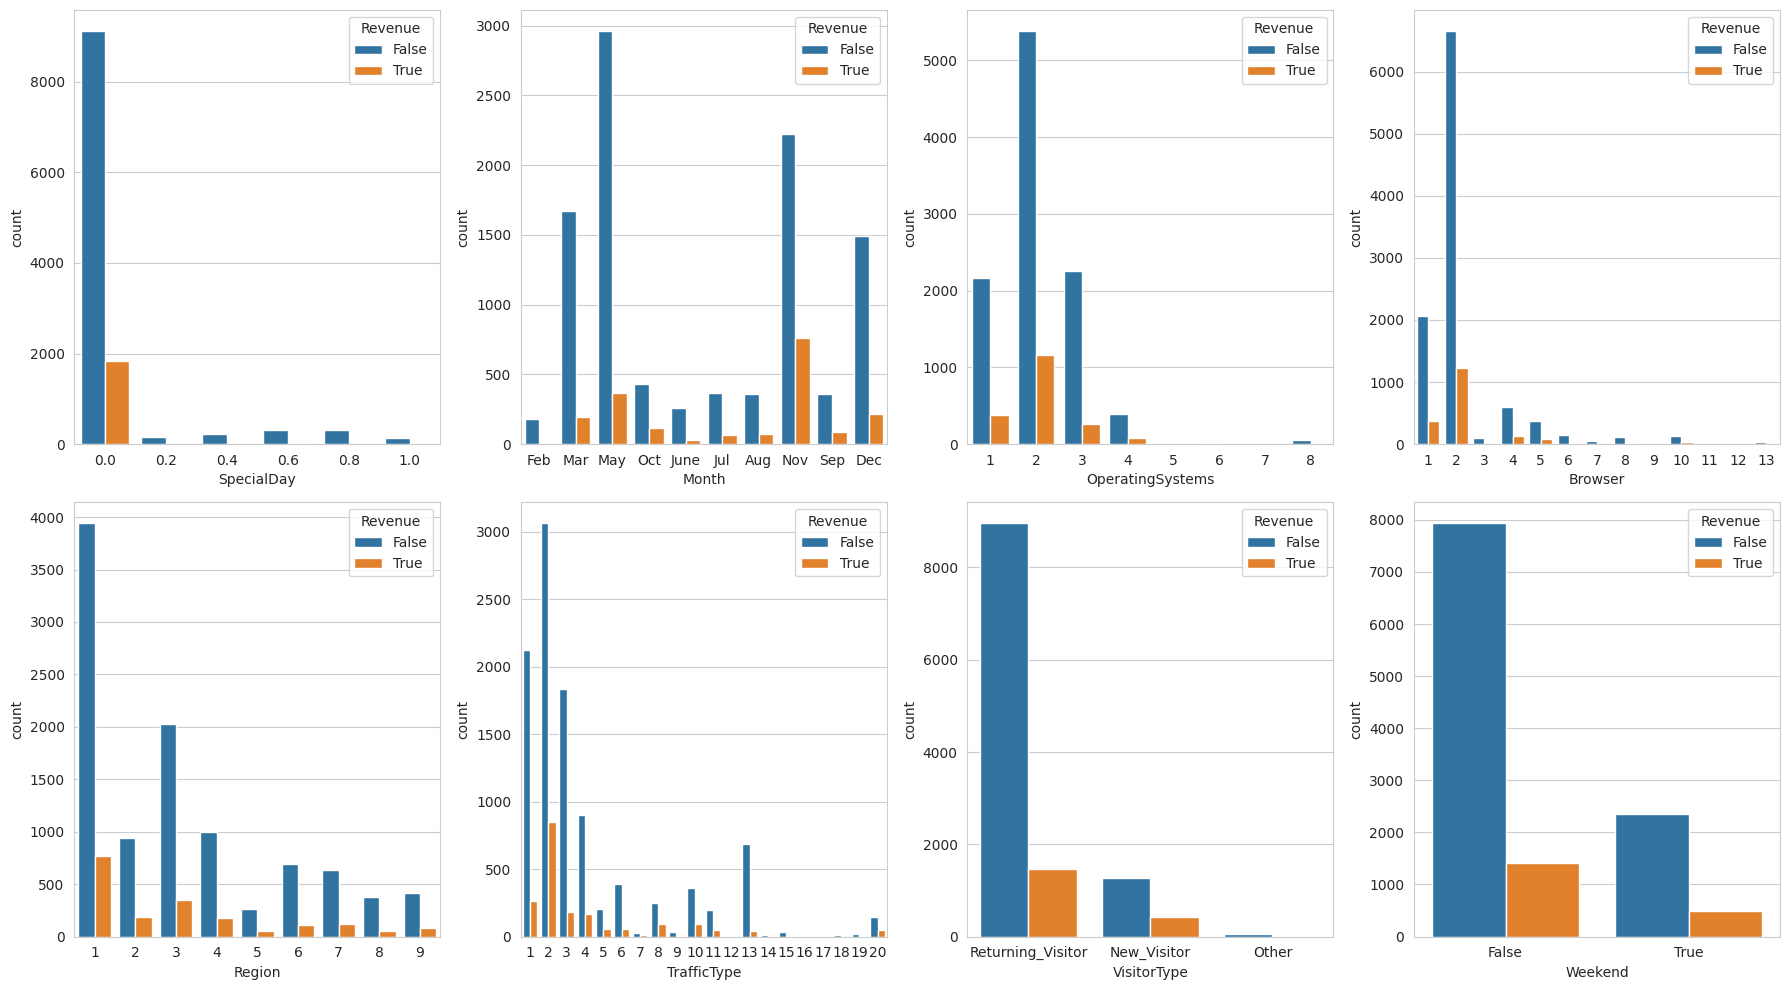

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)  # Add some space between subplots

# Plot distribution of each extended categorical feature and its relation with Revenue
for i, feature in enumerate(categorical_features):
  ax = axes[i // 4, i % 4]  # Get the appropriate subplot
  sns.countplot(x=feature,
                data=data,
                hue='Revenue',
                ax=ax)
# Remove empty subplots
for i in range(len(categorical_features), 8):
    fig.delaxes(axes[i // 4, i % 4])

plt.tight_layout()
plt.show()

From the graphs above, we may expect how these features perform in predictions:
* Closer to the special day, the more likely the customers visit the websites and also make purchases.
* On average, the returning visitors are more likely to make purchases.
* In certain months, like November, December, and May, customers are more likely to spend on the website.


## Visualize numerical features

To understand the relationships between numerical features, we use pairplot to visualize the correlations.

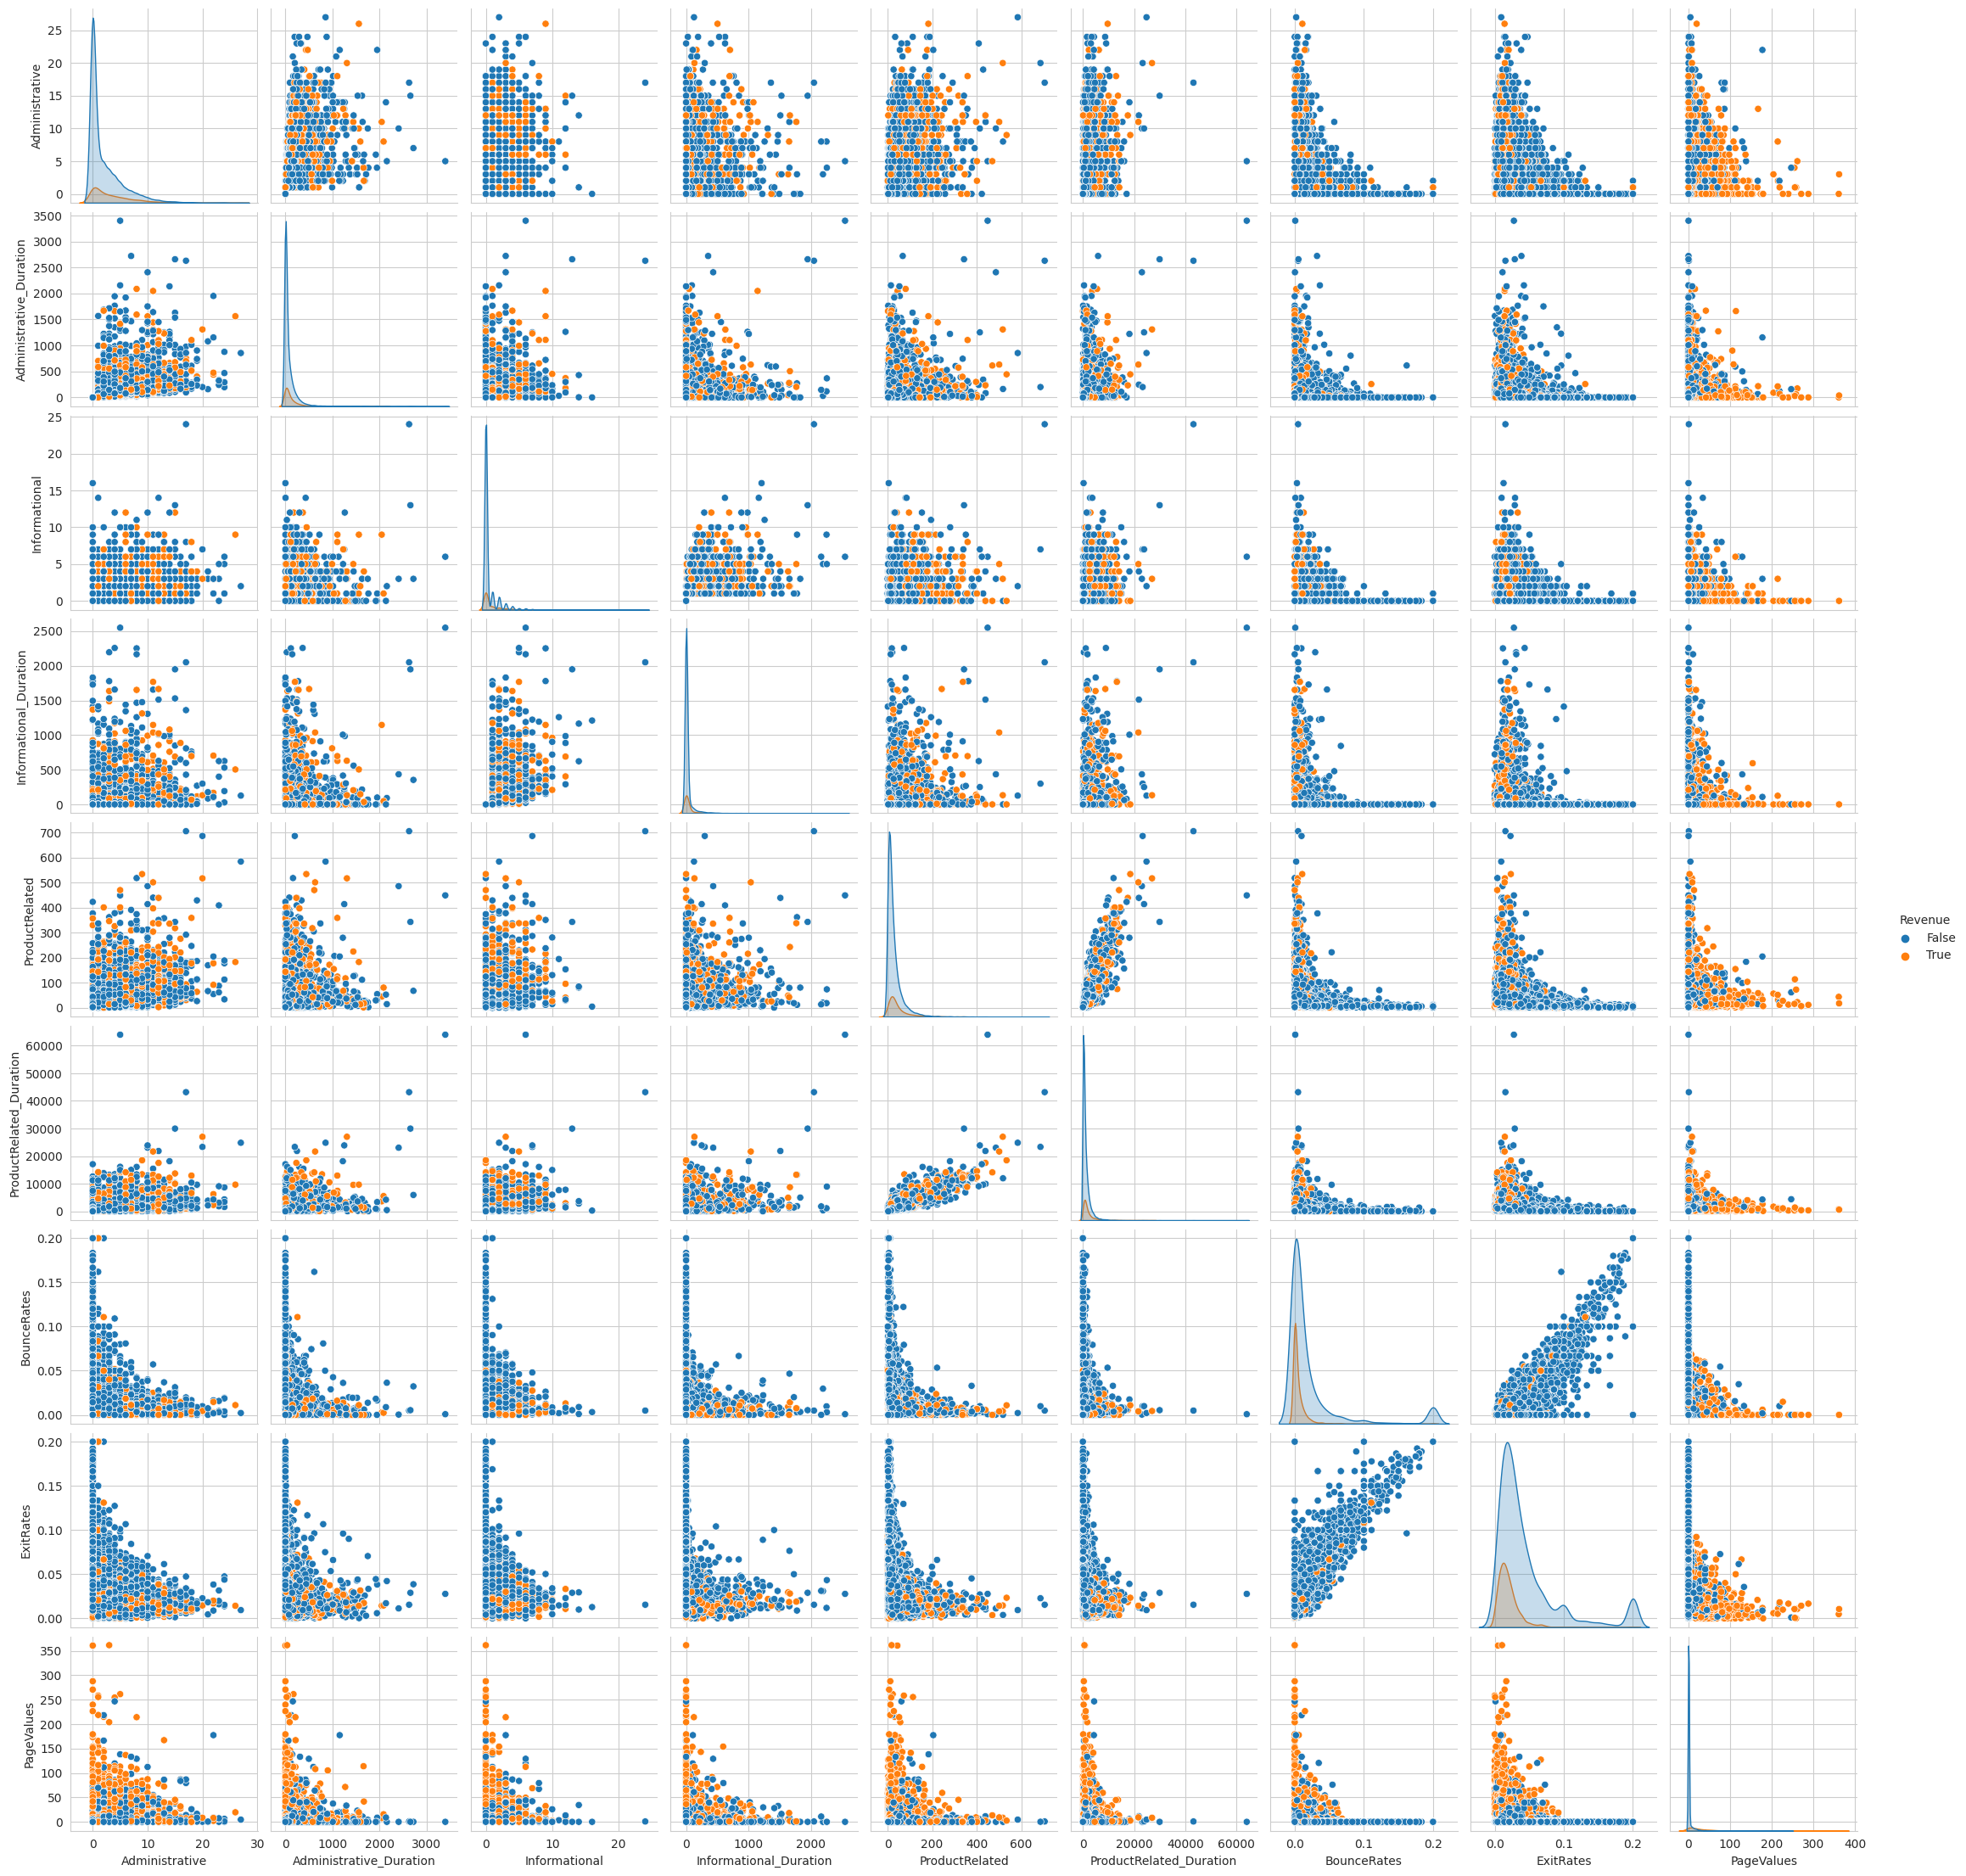

In [ ]:
# Plot pairplot for continuous numeric features
sns.pairplot(data, vars=numeric_features, hue='Revenue')
plt.show()

From the graphs above, we can make these conclusions:

* High correlation may exist between 'ExitRates' & 'BounceRates'; 'ProductRelated_Duration' & 'ProductRelated'.
* The classification pattern of 'PageValues' is very obivious.
* Classification patterns are clear between all combinations of ('BounceRates', 'ExitRates') & ('Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration').
* Distributions of all numeric features are positively skewed, so we should apply logarithmic transform to all numeric features.

## Correlation analysis

To better understand the observations we just found out from the pairplot, we create the correlation matrix and see how continuous features correlate with each other.

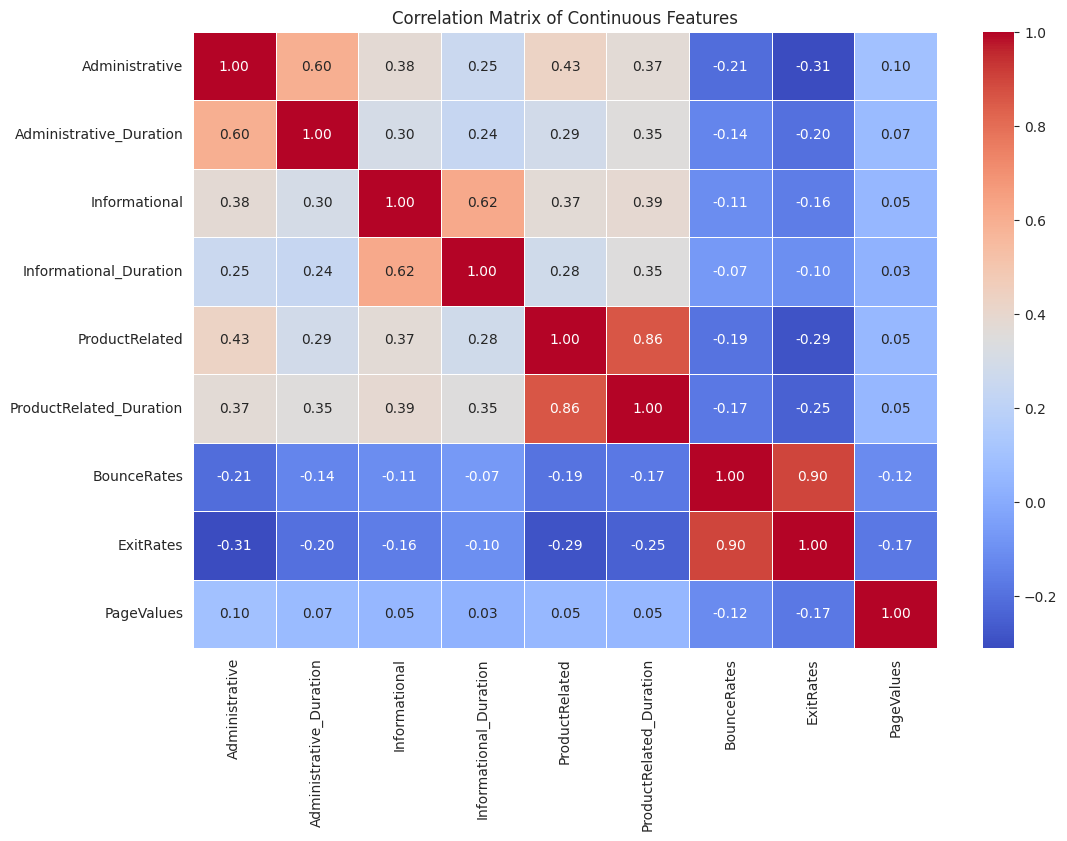

In [ ]:
# Compute the correlation matrix
correlation_matrix = data[numeric_features].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features")
plt.show()

From the graph, We can easily observe high correlation between 'ExitRates' & 'BounceRates'; 'ProductRelated_Duration' & 'ProductRelated' and therefore perform PCA to them to reduce dimensionality

# **Pipeline**

After cleaning our data and having an insight of them, we are ready to build the pipeline which helps us prepare the data to build the models.

In [ ]:
# Binary Mapping for Target
data['Revenue'] = data['Revenue'].astype(int)
data['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

Since 'Revenue' is the target that we want to predict, we drop it from the input group (X), and make it the target group (y).

In [ ]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Then, since we have different types of data, we will have to handle them differently in the pipeline for further model building.

First, to handle highly skewed distributions, for example, the Administrative we have seen in the previous pairplot, we standardize them and make the data more normally distributed.

Then, to reduce the dimensionality for, for instance, the relationship between ProductRelated and ProductRelated_Duration, we apply Principal Component Analysis (PCA) to transform them.

Lastly, to handle categorical variables, we apply OneHotEncoder to make them into dummy variables.

## Preprocessing Pipeline

In [ ]:
categorical_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
numeric_features = [col for col in data.columns if (col not in categorical_features) & (col != 'Revenue')]

# Logarithmic transform & Standardize to handle skewed distributions
log_std_pipeline = make_pipeline(
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

# PCA to reduce the dimensionality
pca_pipeline = make_pipeline(
    FunctionTransformer(np.log1p),
    StandardScaler(),
    PCA(n_components=1)
)

# Transformer to convert sparse matrix to dense matrix
class SparseToDenseTransformer(TransformerMixin):
    def transform(self, X, y=None, **fit_params):
        return X.toarray()

    def fit(self, X, y=None, **fit_params):
        return self

    # Adding method to return feature names
    def get_feature_names_out(self, input_features=None):
        return input_features

# OneHotEncoder to make categorical features into dummy variables
onehotencoder_pipeline = make_pipeline(
    OneHotEncoder(drop="first", handle_unknown='ignore'), # drop first to avoid multicolinearity, igore unseen values in the train set
    SparseToDenseTransformer() # Some models such as SVM/MLP cannot deal with sparse matrix
    )

# handle each type of column with appropriate pipeline
# Target 'Revenue' should be excluded from the pipeline since all data went through pipline will be considered as features(i.e. X) in the training process
prepare_pipeline = ColumnTransformer([
    ('numerical', log_std_pipeline, [col for col in numeric_features if col not in ['BounceRates', 'ExitRates', 'ProductRelated', 'ProductRelated_Duration']]),
    ('multicollinearity1', pca_pipeline, ['BounceRates', 'ExitRates']),
    ('multicollinearity2', pca_pipeline, ['ProductRelated', 'ProductRelated_Duration']),
    ('categorical', onehotencoder_pipeline, categorical_features)
    ])

prepare_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Administrative', 'Administrative_Duration',
                                  'Informational', 'Informational_Duration',
                                  'PageValues']),
                                ('multicollinearity1',
                                 Pipeline(steps=[('functiontransfo...
                                                 ('pca', PCA(n_components=1))]),
                                 ['ProductRelated', 'ProductRelated_Duration']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore')),
                                                 ('sparsetodensetransformer',
                                                  <__main__.SparseToDenseTransformer object at 0x7fa6e3f4da50>)]),
                                 ['SpecialDay', 'Month', 'OperatingSystems',
                                  'Browser', 'Region', 'TrafficType',
                                  'VisitorType', 'Weekend'])])

Now, we have our initial pipeline.

To further create a pipeline including our previous data preprocessing and a feature selection, we use Recursive Feature Elimination with Cross-Validation (RFECV).

In [ ]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

# Define the LightGBM classifier, set class_weight to address class imbalance, set verbose = -1 to hide process
lgb_clf = LGBMClassifier(random_state=42, class_weight='balanced', verbose=-1)

# Define Recursive Feature Elimination with Cross-Validation using LightGBM
rfecv = RFECV(lgb_clf, scoring='roc_auc', cv=5)

# Create a pipeline including data preprocessing and feature selection
rfecv_pipeline = Pipeline([
    ('prepare', prepare_pipeline),
    ('feature_selection', rfecv)
])

rfecv_pipeline

Pipeline(steps=[('prepare',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'PageValues']),
                                                 ('multicollinearity1',
                                                  Pipeli...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('sparsetodensetransformer',
                                                                   <__main__.SparseToDenseTransformer object at 0x7fa6e3f4da50>)]),
                                                  ['SpecialDay', 'Month',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('feature_selection',
                 RFECV(cv=5,
                       estimator=LGBMClassifier(class_weight='balanced',
                                                random_state=42, verbose=-1),
                       scoring='roc_auc'))])

As we have the new pipeline, we fit it to our training data.

## Feature Selection

Optimal number of features: 39
roc_auc at optimal number of features: 0.923


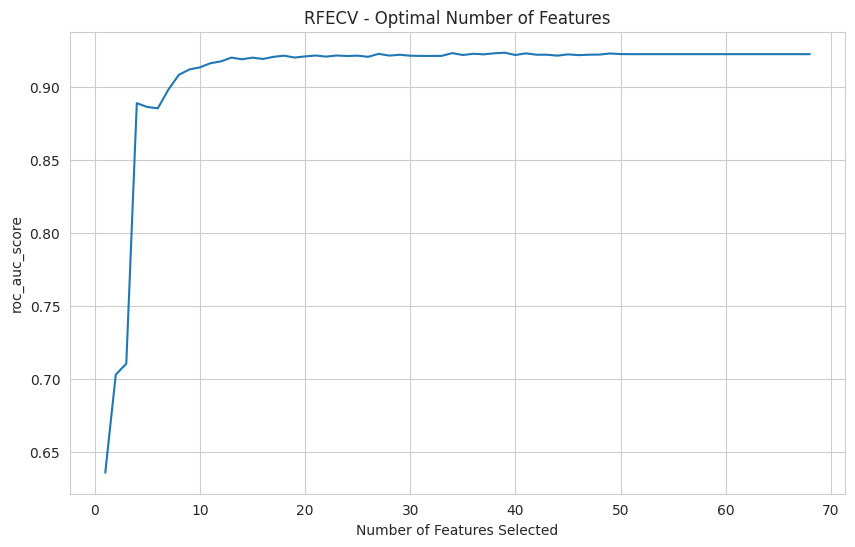

In [ ]:
# Take about about 2 mins to run
rfecv_pipeline.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("roc_auc_score")
mean_score = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_score) + 1), mean_score)

optimal_num_features = rfecv.n_features_
optimal_roc_auc_socre = rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"Optimal number of features: {optimal_num_features}")
print(f"roc_auc at optimal number of features: {optimal_roc_auc_socre:.3f}")

To facilitate our running speed, we simply pass the number of features to RFE estimator instead of using REFCV

In [ ]:
from sklearn.feature_selection import RFE

# Now with number of features known we increase speed of selection
# by specifying n_features_to_select in RFE without using cross-validation
rfe = RFE(lgb_clf, n_features_to_select=optimal_num_features)

# Create rfe pipeline
rfe_pipeline = Pipeline([
    ('prepare', prepare_pipeline),
    ('feature_selection', rfe)
])

rfe_pipeline

Pipeline(steps=[('prepare',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'PageValues']),
                                                 ('multicollinearity1',
                                                  Pipeli...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('sparsetodensetransformer',
                                                                   <__main__.SparseToDenseTransformer object at 0x7fa6e3f4da50>)]),
                                                  ['SpecialDay', 'Month',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('feature_selection',
                 RFE(estimator=LGBMClassifier(class_weight='balanced',
                                              random_state=42, verbose=-1),
                     n_features_to_select=39))])

In [ ]:
rfe_pipeline.fit(X_train, y_train)
rfe_step = rfe_pipeline.named_steps['feature_selection']

selected_feature_mask = rfe_step.support_
selected_feature_indices = np.where(selected_feature_mask)[0]

# Extract feature names from the pipeline
feature_names = []

# Numeric features excluding those subjected to PCA
numeric_features_excluding_pca = [col for col in numeric_features if col not in ['BounceRates', 'ExitRates', 'ProductRelated', 'ProductRelated_Duration']]
feature_names.extend(numeric_features_excluding_pca)

# Names for PCA transformed features
feature_names.extend(['PCA_BounceRates_ExitRates', 'PCA_ProductRelated_ProductRelatedDuration'])

# Extracting feature names from OneHotEncoder
categorical_feature_names = prepare_pipeline.named_transformers_['categorical'].get_feature_names_out(categorical_features)
feature_names.extend(categorical_feature_names)

selected_feature_names = []
for i in selected_feature_indices:
  selected_feature_names.append(feature_names[i])

print(selected_feature_names)
print(len(selected_feature_names))

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'PageValues', 'PCA_BounceRates_ExitRates', 'PCA_ProductRelated_ProductRelatedDuration', 'SpecialDay_0.8', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_2', 'OperatingSystems_3', 'Browser_2', 'Browser_4', 'Browser_5', 'Browser_6', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_20', 'VisitorType_Returning_Visitor', 'Weekend_True']
39


With rfe_pipeline, we are ready to fit into models and start our comparison.

# **Model Building**

Before we start fitting in models, we first define the function for score evaluations to compare the results.

Before evaluating the test results, we also want to look at train scores. Therefore, we define two functions, print_train_scores and print_test_scores.

In [ ]:
# define train score evaluation
def print_train_scores(y_train, y_train_pred, y_train_pred_proba):
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
  train_recall_score = recall_score(y_train, y_train_pred)
  train_f1_score = f1_score(y_train, y_train_pred)

  print('train scores are:')
  print(f'accuracy: {train_accuracy:.3f}, roc_auc: {train_roc_auc:.3f}, recall: {train_recall_score:.3f}, f1_score: {train_f1_score:.3f}')

# define test score evaluation
def print_test_scores(y_test, y_pred, y_pred_proba):
  test_accuracy = accuracy_score(y_test, y_pred)
  test_roc_auc = roc_auc_score(y_test, y_pred_proba)
  test_recall_score = recall_score(y_test, y_pred)
  test_f1_score = f1_score(y_test, y_pred)

  print('test scores are:')
  print(f'accuracy: {test_accuracy:.3f}, roc_auc: {test_roc_auc:.3f}, recall: {test_recall_score:.3f}, f1_score: {test_f1_score:.3f}')

# define cross validation score
def print_cross_val_score(model_pipeline, X_train, y_train):
  cross_val_accuracy = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
  cross_val_roc_auc = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
  cross_val_recall = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='recall')
  cross_val_f1_score = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='f1')

  print('cross validation scores are:')
  print(f'accuracy: {cross_val_accuracy.mean():.3f}, roc_auc: {cross_val_roc_auc.mean():.3f}, recall: {cross_val_recall.mean():.3f}, f1_score: {cross_val_f1_score.mean():.3f}')

With the function, we can start build models and evaluate them.

## Logistic Regression

**Evaluate Perfromance on Train & Cross Validaton**

In [ ]:
# Create a pipeline that includes preprocessing and the classifier
lr_pipeline = make_pipeline(rfe_pipeline, LogisticRegression())

# train the model
lr_pipeline.fit(X_train, y_train)

# Making predictions on the train set using the fitted pipeline
y_train_pred = lr_pipeline.predict(X_train)

# predict the train set probabilities of the positive class
y_train_pred_proba = lr_pipeline.predict_proba(X_train)[:,1]

print_train_scores(y_train, y_train_pred, y_train_pred_proba)

train scores are:
accuracy: 0.894, roc_auc: 0.919, recall: 0.565, f1_score: 0.629


In [ ]:
print_cross_val_score(lr_pipeline, X_train, y_train)

cross validation scores are:
accuracy: 0.892, roc_auc: 0.915, recall: 0.559, f1_score: 0.622


**Evalute Performance on Test**

In [ ]:
# Making predictions on the test set using the fitted pipeline
y_pred = lr_pipeline.predict(X_test)

# predict the test set probabilities of the positive class
y_pred_proba = lr_pipeline.predict_proba(X_test)[:,1]

# Evaluate performance on the test set
print_test_scores(y_test, y_pred, y_pred_proba)

test scores are:
accuracy: 0.898, roc_auc: 0.917, recall: 0.559, f1_score: 0.620


The Logistic Regression model returns an accuracy of 0.898, roc_auc of 0.917, recall of 0.559, and f1_score of 0.620 on the testing data.

## Random Forest

**Evaluate Perfromance on Train & Cross Validaton**

In [ ]:
# Create a pipeline that includes preprocessing and the classifier
rf_pipeline = make_pipeline(rfe_pipeline, RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100))

# train the model
rf_pipeline.fit(X_train, y_train)

# Making predictions on the train set using the fitted pipeline
y_train_pred = rf_pipeline.predict(X_train)

# predict the train set probabilities of the positive class
y_train_pred_proba = rf_pipeline.predict_proba(X_train)[:,1]

print_train_scores(y_train, y_train_pred, y_train_pred_proba)

train scores are:
accuracy: 1.000, roc_auc: 1.000, recall: 0.999, f1_score: 1.000


In [ ]:
print_cross_val_score(rf_pipeline, X_train, y_train)

cross validation scores are:
accuracy: 0.894, roc_auc: 0.920, recall: 0.535, f1_score: 0.619


**Finetuning**

In [ ]:
# Set parameter range (about 12mins to run)
rf_param_dist =  {
    'randomforestclassifier__max_depth': np.arange(5, 101, 5),
    'randomforestclassifier__min_samples_leaf': np.arange(5, 151, 5)
}

# Create a RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(rf_pipeline,
                                      rf_param_dist,
                                      n_iter=20,
                                      cv=5,
                                      scoring='roc_auc',
                                      random_state=42)

# Fit the random search to the data
rf_random_search.fit(X_train, y_train)

print('The best parameters are ', rf_random_search.best_params_)
print(f'Best roc_auc for Random Search is {rf_random_search.best_score_:.3f}')

The best parameters are  {'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__max_depth': 35}
Best roc_auc for Random Search is 0.926


**Evalute Performance on Test**

In [ ]:
# Updating the RandomForestClassifier in the pipeline with the best parameters
rf_pipeline.set_params(randomforestclassifier__max_depth=rf_random_search.best_params_['randomforestclassifier__max_depth'],
                       randomforestclassifier__min_samples_leaf=rf_random_search.best_params_['randomforestclassifier__min_samples_leaf'])

# Fit the data again
rf_pipeline.fit(X_train, y_train)

# Making predictions on the test set using the fitted pipeline
y_pred = rf_pipeline.predict(X_test)

# predict the test set probabilities of the positive class
y_pred_proba = rf_pipeline.predict_proba(X_test)[:,1]

# Evaluate performance on the test set
print_test_scores(y_test, y_pred, y_pred_proba)

test scores are:
accuracy: 0.878, roc_auc: 0.934, recall: 0.830, f1_score: 0.669


The Random Forest model returns an accuracy of 0.878, roc_auc of 0.934, recall of 0.830, and f1_score of 0.669 on the testing data after finetuning the hyperparameters. It has a good overall performance than the previous model.

### Important Features

In [ ]:
feature_importances = rf_pipeline.named_steps['randomforestclassifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index().drop('index', axis = 1)
feature_importance_df = feature_importance_df[:10]
feature_importance_df

,Feature,Importance
0,PageValues,0.516634
1,PCA_BounceRates_ExitRates,0.115417
2,PCA_ProductRelated_ProductRelatedDuration,0.097633
3,Administrative_Duration,0.045311
4,Month_Nov,0.041064
5,Administrative,0.037670
6,Informational_Duration,0.015098
7,Month_May,0.013574
8,TrafficType_2,0.013282
9,VisitorType_Returning_Visitor,0.012875


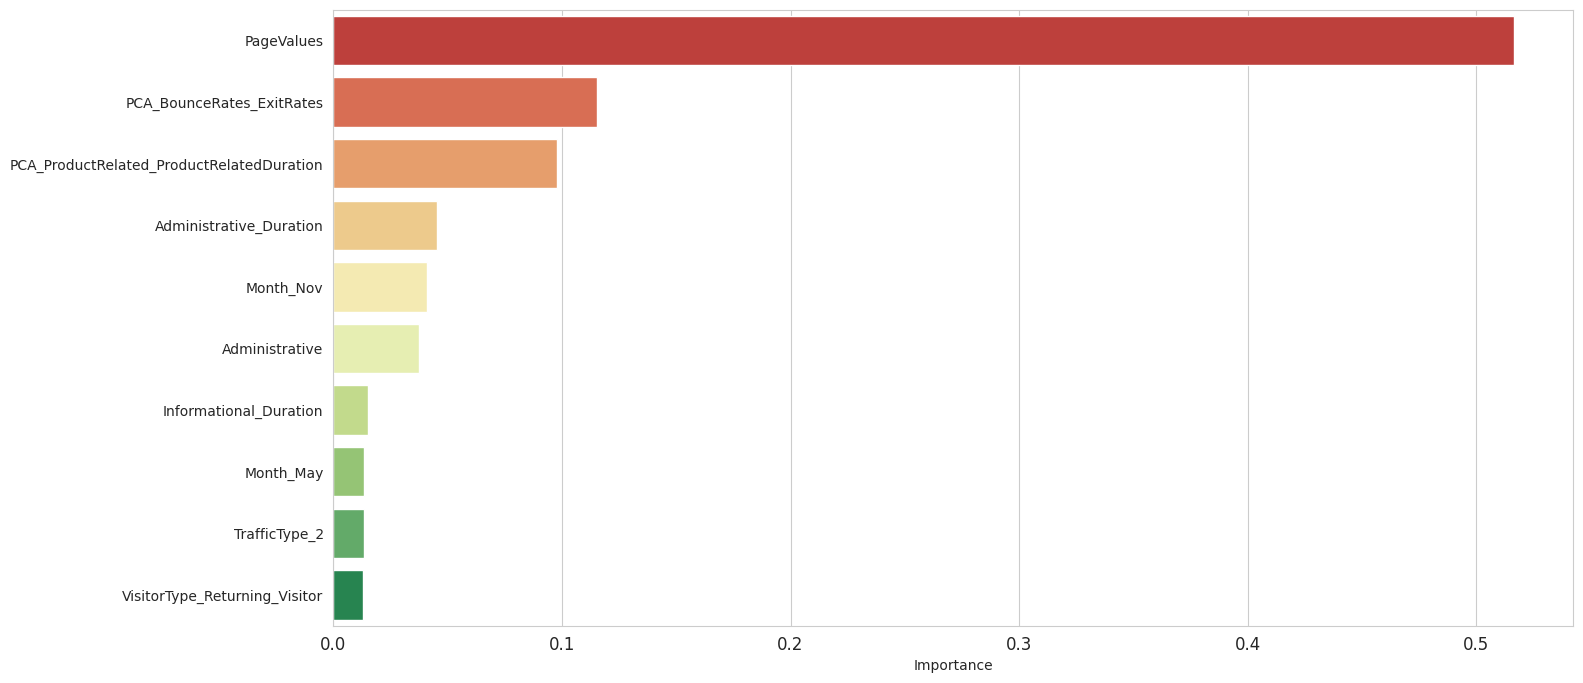

In [ ]:
#visualizing coefficients of most important features
plt.figure(figsize=[16, 8])
sns.barplot(x='Importance', y='Feature', data = feature_importance_df, palette='RdYlGn')
plt.ylabel('', fontsize=14)
plt.xlabel('Importance')
plt.xticks(fontsize=12)
plt.show()

## SVM

**Evaluate Perfromance on Train & Cross Validaton**

In [ ]:
# Create a pipeline that includes preprocessing and the classifier
svm_pipeline = make_pipeline(rfe_pipeline, SVC(random_state=42, kernel='rbf', class_weight='balanced', probability=True))

# train the model
svm_pipeline.fit(X_train, y_train)

# Making predictions on the train set using the fitted pipeline
y_train_pred = svm_pipeline.predict(X_train)

# predict the train set probabilities of the positive class
y_train_pred_proba = svm_pipeline.decision_function(X_train)

print_train_scores(y_train, y_train_pred, y_train_pred_proba)

train scores are:
accuracy: 0.876, roc_auc: 1.000, recall: 0.880, f1_score: 0.693


In [ ]:
print_cross_val_score(svm_pipeline, X_train, y_train)

cross validation scores are:
accuracy: 0.863, roc_auc: 0.916, recall: 0.836, f1_score: 0.661


**Finetuning**

In [ ]:
svm_param_dist = {
    'svc__C': uniform(0.1, 10),  # Use uniform for continuous values
    'svc__gamma': ['scale', 'auto'] + list(uniform(0.01, 1.0).rvs(size=5)),
    'svc__degree': [2, 3, 4]
}

svm_random_search = RandomizedSearchCV(svm_pipeline,
                                       svm_param_dist,
                                       n_iter=20,
                                       cv=5,
                                       scoring='roc_auc')

svm_random_search.fit(X_train, y_train)

print('The best parameters are ', svm_random_search.best_params_)
print(f'Best roc_auc for Random Search is {svm_random_search.best_score_:.3f}')

The best parameters are  {'svc__C': 2.111050922373169, 'svc__degree': 3, 'svc__gamma': 'auto'}
Best roc_auc for Random Search is 0.920


**Evalute Performance on Test**

In [ ]:
# Updating the RandomForestClassifier in the pipeline with the best parameters
svm_pipeline.set_params(svc__C=svm_random_search.best_params_['svc__C'],
                        svc__gamma=svm_random_search.best_params_['svc__gamma'],
                        svc__degree=svm_random_search.best_params_['svc__degree']
                       )

# Fit the data again
svm_pipeline.fit(X_train, y_train)

# Making predictions on the test set using the fitted pipeline
y_pred = svm_pipeline.predict(X_test)

# predict the test set probabilities of the positive class
y_pred_proba = svm_pipeline.decision_function(X_test)

# Evaluate performance on the test set
print_test_scores(y_test, y_pred, y_pred_proba)

test scores are:
accuracy: 0.870, roc_auc: 0.928, recall: 0.832, f1_score: 0.656


The SVM returns an accuracy of 0.870, roc_auc of 0.928, recall of 0.832, and f1_score of 0.656 on the testing data after finetuning the hyperparameters. It performs slightly worse than the Random Forest model but has a higher recall rate.

## XGBoost

In [ ]:
# Create a pipeline that includes preprocessing and the classifier
xgb_pipeline = make_pipeline(rfe_pipeline, XGBClassifier(random_state=42, class_weight='balanced'))

# train the model
xgb_pipeline.fit(X_train, y_train)

# Making predictions on the train set using the fitted pipeline
y_train_pred = xgb_pipeline.predict(X_train)

# predict the train set probabilities of the positive class
y_train_pred_proba = xgb_pipeline.predict_proba(X_train)[:,1]

print_train_scores(y_train, y_train_pred, y_train_pred_proba)

train scores are:
accuracy: 0.980, roc_auc: 0.995, recall: 0.890, f1_score: 0.935


**Evaluate Perfromance on Train & Cross Validaton**

In [ ]:
X_train_prepared = rfe_pipeline.fit_transform(X_train, y_train)

xgb_classifier = XGBClassifier()
model = xgb_classifier.fit(X_train_prepared,y_train)

# Calcultate accuracy and roc_auc using cross validation approach
cross_val_accuracy = cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='accuracy')
cross_val_roc_auc = cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='roc_auc')
cross_val_recall = cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='recall')
cross_val_f1_score = cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='f1')

print('cross validation scores are:')
print(f'accuracy: {cross_val_accuracy.mean():.3f}, roc_auc: {cross_val_roc_auc.mean():.3f}, recall: {cross_val_recall.mean():.3f}, f1_score: {cross_val_f1_score.mean():.3f}')

cross validation scores are:
accuracy: 0.891, roc_auc: 0.913, recall: 0.580, f1_score: 0.628


**Finetuning**

In [ ]:
xgb_pipeline = make_pipeline(rfe_pipeline, XGBClassifier(random_state=42, class_weight='balanced'))

param_rd = {
    'xgbclassifier__n_estimators': np.arange(100, 501, 100),
    'xgbclassifier__learning_rate': np.arange(0.01, 0.06, 0.01),
    'xgbclassifier__max_depth': np.arange(5, 51, 5),
}

# Perform grid search
xgb_rd_search = RandomizedSearchCV(xgb_pipeline,
                                   param_rd,
                                   cv=5,
                                   scoring='roc_auc',
                                   n_iter=20)


xgb_rd_search.fit(X_train, y_train)

print('The best parameters are ', xgb_rd_search.best_params_)
print(f'Best roc_auc for Random Search is {xgb_rd_search.best_score_:.3f}')

The best parameters are  {'xgbclassifier__n_estimators': 300, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.02}
Best roc_auc for Random Search is 0.928


**Evalute Performance on Test**

In [ ]:
# Updating the RandomForestClassifier in the pipeline with the best parameters (about 20mins to run)
xgb_pipeline.set_params(xgbclassifier__n_estimators=xgb_rd_search.best_params_['xgbclassifier__n_estimators'],
                        xgbclassifier__learning_rate=xgb_rd_search.best_params_['xgbclassifier__learning_rate'],
                        xgbclassifier__max_depth=xgb_rd_search.best_params_['xgbclassifier__max_depth'])

# Fit the data again
xgb_pipeline.fit(X_train, y_train)

# Making predictions on the test set using the fitted pipeline
y_pred = xgb_pipeline.predict(X_test)

# predict the test set probabilities of the positive class
y_pred_proba = xgb_pipeline.predict_proba(X_test)[:,1]

# Evaluate performance on the test set
print_test_scores(y_test, y_pred, y_pred_proba)

test scores are:
accuracy: 0.912, roc_auc: 0.938, recall: 0.619, f1_score: 0.677


The SVM returns an accuracy of 0.912, roc_auc of 0.938, recall of 0.619, and f1_score of 0.677 on the testing data after finetuning the hyperparameters. It has a high accuracy score, however, for a dataset that is not balanced, a high accuracy score can be misleading. It has a low recall rate, meaning that it does not predict true positives very well.

## MLP

Retrive the number of features after the preprocess pipeline to define the number of input neurons on the first layer.

In [ ]:
# preprocess the data using the modified pipeline
X_train_prepared = rfe_pipeline.fit_transform(X_train, y_train)
X_test_prepared = rfe_pipeline.transform(X_test)
X_train_prepared.shape[1]

39

In [ ]:
# create validation set from X_train_prepared
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_prepared, y_train, test_size=0.2, random_state=42)

In [ ]:
# apply oversampling method
smote = SVMSMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sub, y_train_sub)

**Finetuning**

In [ ]:
!rm -rf /content/untitled_project

In [ ]:
def model_builder(hp):
    # tune batch size
    batch_size = hp.Choice('batch_size', [32, 64, 128])

    model = Sequential()
    # Tune the number of hidden layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        # Tune number of neurons on hidden layers
        units = hp.Int(f"units_{i}", min_value=10, max_value=100, step=20)

        # 1st hidden layer or not
        if i == 0:
            # input shape needs to be specified on the 1st hidden layer
            model.add(Dense(units, activation=hp.Choice("activation", ["relu", "tanh"]), input_shape=(X_train_resampled.shape[1],)))
        else:
            model.add(Dense(units, activation=hp.Choice("activation", ["relu", "tanh"])))

        # tune dropout rate
        model.add(Dropout(hp.Float(f"dropout_{i}", min_value=0.0, max_value=0.5, step=0.1)))

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])

    return model

# create tuner
tuner = kt.BayesianOptimization(
    model_builder,
    objective=kt.Objective('val_auc', direction="max"),
    max_trials=30,  # Number of trials to run
    executions_per_trial=3,  # Number of models that should be built and fit for each trial
)

# tune the model
tuner.search(X_train_resampled, y_train_resampled, epochs=10, validation_data=(X_val, y_val))

# get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 00m 47s]
val_auc: 0.9224168658256531

Best val_auc So Far: 0.9237172802289327
Total elapsed time: 00h 20m 46s


In [ ]:
# get best params
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print best params
print(f"""
  batch size: {best_hps.get('batch_size')}
  num_layers: {best_hps.get('num_layers')}
  activation: {best_hps.get('activation')}
      """)

for i in range(best_hps.get('num_layers')):
  print(f"""
  units_{i}: {best_hps.get(f'units_{i}')}
  dropout_{i}: {best_hps.get(f'dropout_{i}')}
  """)

# Evaluate the best model
loss, recall = best_model.evaluate(X_test_prepared, y_test)



  batch size: 64
  num_layers: 2
  activation: tanh    
      

  units_0: 70
  dropout_0: 0.2
  

  units_1: 70
  dropout_1: 0.1
  
115/115 [==============================] - 0s 2ms/step - loss: 0.3168 - auc: 0.9337


Integrate the model to the pipeline.

**Evalute Performance on Test**

In [ ]:
K.clear_session()

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs):
        # customization
        self.epochs = epochs

        # preset
        self.model = self._create_model()
        self.batch_size = best_hps.get('batch_size')

    def _create_model(self):
        model = Sequential()
        for i in range(best_hps.get('num_layers')):

            # 1st hidden layer or not
            if i == 0:
                # input shape needs to be specified on the 1st hidden layer
                model.add(Dense(units=best_hps.get(f'units_{i}'), activation=best_hps.get('activation') , input_shape=(X_train_sub.shape[1],)))
            else:
                model.add(Dense(units=best_hps.get(f'units_{i}'), activation=best_hps.get('activation')))

            # tune dropout rate
            model.add(Dropout(best_hps.get(f'dropout_{i}')))

        # output layer
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(), Recall()])
        return model

    def fit(self, X, y, **kwargs):
        self.classes_ = np.unique(y)
        self.history = self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1, **kwargs).history
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int).reshape(-1)

    def predict_proba(self, X):
        proba = self.model.predict(X)
        return np.hstack([1 - proba, proba])

# Define keras classifier
keras_clf = KerasClassifier(epochs=10)

keras_smote_pipeline = imblearnPipeline([
    ('prepare', prepare_pipeline),
    ('feature_selection', rfe),
    ('oversample', SVMSMOTE(random_state=42)),
    ('classifier', keras_clf)
])

test_accuracy_MLP = []
test_roc_auc_MLP = []
test_recall_score_MLP = []
test_f1_score_MLP = []

for i in range(0,5):
  keras_smote_pipeline.fit(X_train, y_train)

  # Evalute accuracy on train and test set
  y_pred = keras_smote_pipeline.predict(X_test)
  y_pred_proba = keras_smote_pipeline.predict_proba(X_test)[:,1]

  test_accuracy = accuracy_score(y_test, y_pred)
  test_roc_auc = roc_auc_score(y_test, y_pred_proba)
  test_recall_score = recall_score(y_test, y_pred)
  test_f1_score = f1_score(y_test, y_pred)

  test_accuracy_MLP.append(test_accuracy)
  test_roc_auc_MLP.append(test_roc_auc)
  test_recall_score_MLP.append(test_recall_score)
  test_f1_score_MLP.append(test_f1_score)

print('Test Scores are:')
print(f'accuracy: {np.mean(test_accuracy_MLP):.3f}, roc_auc: {np.mean(test_roc_auc_MLP):.3f}, recall: {np.mean(test_recall_score_MLP):.3f}, f1_score: {np.mean(test_f1_score_MLP):.3f}')

keras_smote_pipeline

Epoch 1/10
225/225 [==============================] - 2s 3ms/step - loss: 0.3844 - accuracy: 0.8400 - auc: 0.9099 - recall: 0.8412
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8566 - auc: 0.9245 - recall: 0.8631
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8637 - auc: 0.9284 - recall: 0.8825
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3222 - accuracy: 0.8670 - auc: 0.9302 - recall: 0.8910
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.8685 - auc: 0.9314 - recall: 0.8929
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.8708 - auc: 0.9325 - recall: 0.8997
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3079 - accuracy: 0.8750 - auc: 0.9351 - recall: 0.9050
Epoch 8/10
225/225 [==============================] - 1s 2ms/step - loss: 0.3053 - 

Pipeline(steps=[('prepare',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'PageValues']),
                                                 ('multicolinearity1',
                                                  Pipelin...
                                                                   <__main__.SparseToDenseTransformer object at 0x7b5ee0eff5e0>)]),
                                                  ['SpecialDay', 'Month',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('feature_selection',
                 RFE(estimator=LGBMClassifier(class_weight='balanced',
                                              random_state=42, verbose=-1),
                     n_features_to_select=39)),
                ('oversample', SVMSMOTE(random_state=42)),
                ('classifier', KerasClassifier(epochs=10))])

The MLP returns an accuracy score of 0.856, roc_auc of 0.928, recall of 0.833, and f1_score of 0.633. It gives the highest recall rate, meaning that it is the most effective way to find true positives compared to other modesl.

## Stacking

Finally, we want to see if the prediction can be even improved by stacking several different models, including random forest, SVM, XGBoost, and MLP.

In [ ]:
K.clear_session()

trained_rf = rf_pipeline.named_steps['randomforestclassifier']
trained_svm = svm_pipeline.named_steps['svc']
trained_xgb = xgb_pipeline.named_steps['xgbclassifier']
trained_mlp = keras_smote_pipeline.named_steps['classifier']

voting_classifier = VotingClassifier(
    estimators=[
        ('rf', trained_rf),
        ('svm', trained_svm),
        ('xgb', trained_xgb),
        ('mlp', trained_mlp)
    ],
    voting = 'soft'
)

# train the model
voting_classifier.fit(X_train_prepared, y_train)

# Making predictions on the test set using the fitted pipeline
y_pred = voting_classifier.predict(X_test_prepared)

# predict the test set probabilities of the positive class
y_pred_proba = voting_classifier.predict_proba(X_test_prepared)[:,1]

# Evaluate performance on the test set
print_test_scores(y_test, y_pred, y_pred_proba)

Epoch 1/10
134/134 [==============================] - 1s 2ms/step - loss: 0.2988 - accuracy: 0.8765 - auc: 0.8725 - recall: 0.5015
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8918 - auc: 0.9067 - recall: 0.5631
Epoch 3/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.8934 - auc: 0.9120 - recall: 0.5764
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8951 - auc: 0.9144 - recall: 0.5940
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.8935 - auc: 0.9176 - recall: 0.5698
Epoch 6/10
134/134 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.8951 - auc: 0.9182 - recall: 0.5940
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8934 - auc: 0.9220 - recall: 0.5859
Epoch 8/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2412 - 

The Stacking returns an accuracy score of 0.899, roc_auc of 0.938, recall of 0.700, and f1_score of 0.674, which is the highest among all the single models.

# Deployment

Finally, to make the models available for use in a production environment, we save the models for future predictions on new data.

In [ ]:
# create new data
new_data = X_test.iloc[:20]

In [ ]:
joblib.dump(rf_pipeline, "purchasing_intention_model_random_forest.pkl")
rf_pipeline_reloaded = joblib.load("purchasing_intention_model_random_forest.pkl")

predictions = rf_pipeline_reloaded.predict(new_data)

print(predictions)

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1]


In [ ]:
joblib.dump(svm_pipeline, "purchasing_intention_model_svm.pkl")
svm_pipeline_reloaded = joblib.load("purchasing_intention_model_svm.pkl")

predictions = svm_pipeline_reloaded.predict(new_data)

print(predictions)

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1]


In [ ]:
joblib.dump(xgb_pipeline, "purchasing_intention_model_XGboost.pkl")
xgb_pipeline_reloaded = joblib.load("purchasing_intention_model_XGboost.pkl")

predictions = xgb_pipeline_reloaded.predict(new_data)

print(predictions)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
joblib.dump(keras_smote_pipeline, "purchasing_intention_model_MLP.pkl")
keras_smote_pipeline_reloaded = joblib.load("purchasing_intention_model_MLP.pkl")

predictions = keras_smote_pipeline_reloaded.predict(new_data)

print(predictions)

1/1 [==============================] - 0s 64ms/step
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]


In [ ]:
joblib.dump(voting_classifier, "purchasing_intention_model_stacking.pkl")
voting_classifier_reloaded = joblib.load("purchasing_intention_model_stacking.pkl")

predictions = voting_classifier_reloaded.predict(X_test_prepared)[0:20]

print(predictions)

115/115 [==============================] - 0s 1ms/step
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


Now, all the models have been saved.

# **Conclusion**


After a thorough evaluation of 5 distinct models, our recommendation to stakeholders centers around two particularly promising models: the **Random Forest** and the **MLP**.

The **Random Forest** model initially exhibits a good accuracy score. However, through finetuning in its roc_auc score, a trade-off is necessitated, resulting in a final configuration with a 0.878 accuracy score, 0.934 roc_auc score, 0.83 recall, and 0.669 f1 score. In practical terms, this signifies the model's ability to predict the target variable with approximately 87.8% accuracy, distinguish between positive and negative instances in about 93.4% of cases, correctly identify around 83% of the actual positive instances, and provide a favorable balance between precision and recall. The average performance of the model surpasses other methods, providing valuable insights into customer behaviors.

On the other hand, the **MLP** model, though yielding slightly lower scores for accuracy, roc_auc, and f1 compared to the Random Forest model, compensates with a notable recall score. This emphasizes its proficiency in capturing positive observations within the total actual positives, effectively minimizing the cost associated with missing positive instances. If the stakeholders want to focus on having a high true positive rate, this is the model they may want to go with.

Given the imbalanced characteristic of our dataset, relying solely on accuracy scores is not sufficient, as this metric can be misleadingly boosted by predicting the predominant class consistently. Therefore, a comprehensive examination of various performance aspects reveals both the Random Forest and MLP models as beneficial. Moreover, when combining the Random Forest, SVM, XG Boost, and MLP in a **stacked ensemble**, an even better outcome is achieved, consisting of a 0.899 accuracy score, 0.938 roc_auc score, 0.7 recall, and 0.674 f1 score.

Gaining insights into and predicting customer behaviors are crucial for business owners, enabling them to optimize marketing strategies and enhance the overall customer experience. This study has suggested approaches to implement it while providing valuable insights into every model.